<a href="https://colab.research.google.com/github/chikakoto/facial-expression-recognition/blob/main/notebooks/Random_Forest_and_SGD_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Instruction
** Please execute following Sections 

1.   Importing Library & Downloading Raw data
2.   Data & Trained Model
3.   Function
4.   Evaluating Machine learning models






# Importing Library & Downloading Raw data

In [1]:
# Importing basic python Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import os
%matplotlib inline
from skimage.transform import resize
from skimage.io import imread
from glob import glob
from scipy import ndimage as ndi
from skimage import feature
from sklearn.utils import shuffle


#Model
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

#Metrics
from sklearn.model_selection import train_test_split, learning_curve, validation_curve, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report
from sklearn.metrics import roc_curve, auc

#GridSearch & Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler


import math
from tensorflow.keras.utils import to_categorical

from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.pipeline import Pipeline
from collections import Counter
import random

from skimage import feature
import pickle
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from yellowbrick.model_selection import learning_curve
from yellowbrick.model_selection import ValidationCurve

#Data & Trained Model

In [13]:
#download data file and trained model from google drive 
#https://drive.google.com/file/d/1mzhh5zqR9IdgdgstGdkSZQmqvGCqDRkz/view?usp=sharing
%%capture
!gdown --id 1mzhh5zqR9IdgdgstGdkSZQmqvGCqDRkz -O data.csv

In [ ]:
#Downloading Pre_Trained model from public google drive directory 
#KNN https://drive.google.com/file/d/1-6pZc8w0NeKz_AGahsmpqGig8gkANNoy/view?usp=sharing
#RF https://drive.google.com/file/d/1-8bPaLG0v_xyHFP8sO34V4uvshrfpJGb/view?usp=sharing
#SGD https://drive.google.com/file/d/1-D8ylpjMvQ0N1KIEVNPlVof8CP2YoIi4/view?usp=sharing
#SVM https://drive.google.com/file/d/1ljHGaSHeouRY7iUP743egGLz1wwIDntj/view?usp=sharing
%%capture
!gdown --id 1-6pZc8w0NeKz_AGahsmpqGig8gkANNoy -O knn.sav
!gdown --id 1ljHGaSHeouRY7iUP743egGLz1wwIDntj -O svm.sav
!gdown --id 1-8bPaLG0v_xyHFP8sO34V4uvshrfpJGb -O rf.sav
!gdown --id 1-D8ylpjMvQ0N1KIEVNPlVof8CP2YoIi4 -O sgd.sav

In [23]:
#Setting up variables for our pre_trained model's and data file 
knn_model = '/content/knn.sav'
rf_model = '/content/rf.sav'
sdg_model = '/content/sdg.sav'
svm_model = '/content/svm.sav'
data = '/content/data.csv'

In [15]:
#importing Data and processing it for testing our model 
emotion_labels = {0:'angry', 1:'disgust', 2:'fear', 3:'happy', 4:'sad', 5:'surprise', 6:'neutral'}
X_train, X_test, y_train, y_test = custom_train_test_split(data, 3)
X= np.concatenate((X_train,X_test))
y= np.concatenate((y_train, y_test))
print('Shape of X and y: ', X.shape, y.shape)

/content/data.csv
Shape of data > : (X_train, X_test, y_train, y_test) (31432, 2304) (7896, 2304) (31432,) (7896,)
Shape of X and y:  (39328, 2304) (39328,)


#Evaluating Machine learning models

## SGD

0.3618287740628166


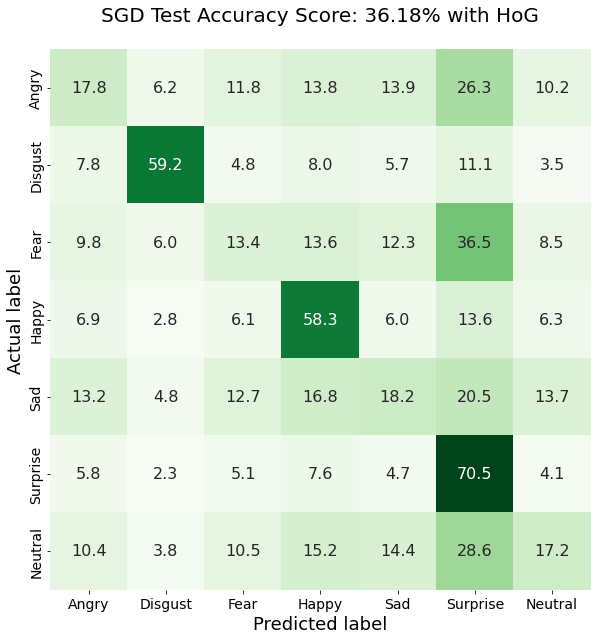

In [28]:
#Load the model and test for accuracy 
sdg_model_ld = pickle.load(open(sdg_model, 'rb'))
score = sdg_model_ld.score(X_test, y_test)
print(score)
y_pred = sdg_model_ld.predict(X_test)
one_plot_cm(confusion_matrix(y_test, y_pred),score, 'SGD', 'HoG')

In [29]:
cm=Confusion_matrix(y_test, y_pred, target_names=['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'])

Confusion Matrix of given model is :
Count=7896           Angry      Disgust    Fear       Happy      Sad        Surprise   Neutral   
Actual Angry          170        59         113        132        133        252        98        
Actual Disgust        65         491        40         66         47         92         29        
Actual Fear           100        61         137        139        126        374        87        
Actual Happy          122        50         108        1034       107        241        112       
Actual Sad            165        60         158        210        227        256        171       
Actual Surprise       48         19         42         63         39         586        34        
Actual Neutral        128        47         129        187        177        353        212       


In [33]:
performance_report(cm, 'SGD', 'HoG\n')

       Classification Report for SGD with HoG

       labels Precision    Recall  F1-Score   Support

        Angry      0.21      0.18      0.19       957
      Disgust      0.62      0.59      0.61       830
         Fear      0.19      0.13      0.16      1024
        Happy      0.56      0.58      0.57      1774
          Sad      0.27      0.18      0.22      1247
     Surprise      0.27      0.71      0.39       831
      Neutral      0.29      0.17      0.21      1233

     Accuracy                          0.36      7896
    Macro_avg      0.34      0.36      0.34      7896
 Weighted_avg      0.36      0.36      0.35      7896


In [ ]:
#Learning Curve
sdg1 = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3,
                      alpha= 0.0001, learning_rate= 'optimal', 
                      loss='hinge', penalty= 'l1')

sdg = SGDClassifier(loss='hinge', penalty= 'l1')
print(learning_curve(sdg, X, y, cv=10, scoring='accuracy'))

In [ ]:
##Validation Curve
sdg = SGDClassifier(loss='hinge', penalty= 'l1')

# Creating a visualizer object
viz = ValidationCurve(sdg, param_name="alpha", n_jobs=-1,
                      param_range=[0.0001, 0.001, 0.01, 0.1, 1,10], cv=10, scoring="accuracy")

# Fit and show the visualizer
viz.fit(X, y)
viz.show()

## Random Forest Classifier

0.5514184397163121


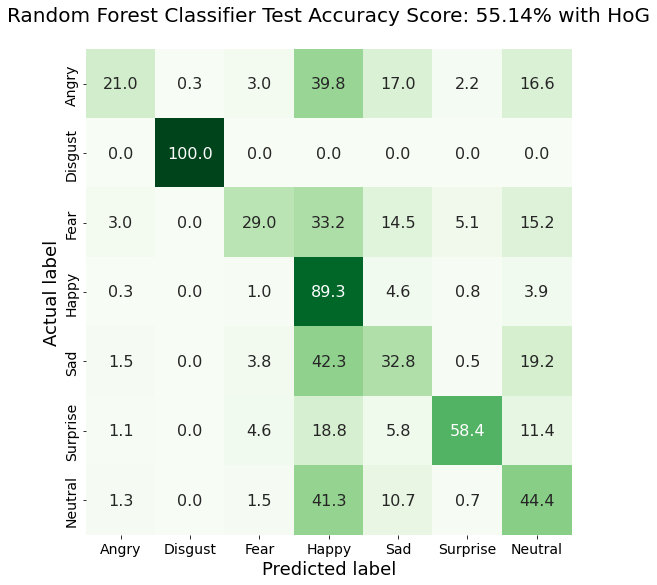

In [34]:
#Load the model and test for accuracy 
rf_model_ld = pickle.load(open(rf_model, 'rb'))
rf_score = rf_model_ld.score(X_test, y_test)
print(rf_score)
y_pred_rf = rf_model_ld.predict(X_test)
one_plot_cm(confusion_matrix(y_test, y_pred_rf),rf_score, 'Random Forest Classifier', 'HoG')

In [49]:
cm=Confusion_matrix(y_test, y_pred_rf, target_names=['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'])

Confusion Matrix of given model is :
Count=7896           Angry      Disgust    Fear       Happy      Sad        Surprise   Neutral   
Actual Angry          201        3          29         381        163        21         159       
Actual Disgust        0          830        0          0          0          0          0         
Actual Fear           31         0          297        340        148        52         156       
Actual Happy          6          0          18         1584       81         15         70        
Actual Sad            19         0          47         527        409        6          239       
Actual Surprise       9          0          38         156        48         485        95        
Actual Neutral        16         0          19         509        132        9          548       


In [50]:
performance_report(cm, 'Random Forest Classifier', 'HoG\n')

       Classification Report for Random Forest Classifier with HoG

       labels Precision    Recall  F1-Score   Support

        Angry      0.71      0.21      0.32       957
      Disgust      1.00      1.00      1.00       830
         Fear      0.66      0.29      0.40      1024
        Happy      0.45      0.89      0.60      1774
          Sad      0.42      0.33      0.37      1247
     Surprise      0.82      0.58      0.68       831
      Neutral      0.43      0.44      0.44      1233

     Accuracy                          0.55      7896
    Macro_avg      0.64      0.54      0.55      7896
 Weighted_avg      0.60      0.55      0.53      7896


In [47]:
#Learning Curve
#rfc = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=0)
rf_lc = RandomForestClassifier(n_estimators=800,max_features='sqrt',
                            random_state=101, n_jobs=-1,max_depth=60, min_samples_leaf=1, min_samples_split=2)
print(learning_curve(rf_lc, X, y, cv=10, scoring='accuracy'))

In [ ]:
# ##Validation Curve
# Making a Random Forest Classifier object
rf = RandomForestClassifier(n_estimators=100, criterion='gini',
                           max_depth=None, n_jobs=-1, random_state=42)

# Creating a visualizer object
viz = ValidationCurve(rf, param_name="max_depth", n_jobs=-1,
                      param_range=np.arange(1, 11), cv=10, scoring="accuracy")

# Fit and show the visualizer
viz.fit(X, y)
viz.show()

# GridSearch CV and Training Machine Learning Model

Following section will cover: 


1.   GridSearch CV for Each Model 
2.   Training Each model with Best Param
3.   Training Each model with data_set:
    - HoG
    - PCA
    - LDA
4.   Evaluating each machine learning algorithms
5.   Testing our Model's with Voting Classifiers








## SGDClassifier - GridSearchCV

In [ ]:
model = SGDClassifier(random_state=42)
loss = ['hinge','log', 'modified_huber','squared_hinge']
penalty = ['l1', 'l2', 'elasticnet']
alpha = [0.0001, 0.001, 0.01, 0.1, 1]
learning_rate = ['optimal']

param_distributions = dict(loss=loss,
                           penalty=penalty,
                           alpha=alpha,
                           learning_rate=learning_rate)

grid = GridSearchCV(estimator=model, 
param_grid=param_distributions, 
scoring='roc_auc', 
verbose=1, 
n_jobs=-1) 

In [ ]:
grid_result = grid.fit(X_train, y_train)

print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

this took 1 hour and 56 minutes for Fitting 5 folds for each of 60 candidates, totalling 300 fits

Fitting 5 folds for each of 60 candidates, totalling 300 fits
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
  category=UserWarning,
Best Score:  nan
- Best Params:  
- {'alpha': 0.0001, 'learning_rate': 'optimal', 'loss': 'hinge', 'penalty': 'l1'}

## RandomForest Grid Search CV

In [ ]:

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
rf = RandomForestClassifier()

In [ ]:
grid_cv = {'n_estimators': [100, 200, 400, 800, 1600, 2000],
     'max_features': ['auto', 'sqrt'],
     'max_depth': [10, 20, 40, 60, 80]}
     #'min_samples_split': [2, 5, 10,50,100],
     #'min_samples_leaf': [1, 2, 4,10]}

In [ ]:
g = {'n_estimators': [100, 200, 400, 800, 1600, 2000],
     'max_features': ['auto', 'sqrt'],
     'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110],
     'min_samples_split': [2, 5, 10,50,100],
     'min_samples_leaf': [1, 2, 4]}

In [ ]:
rf_grid_cv = GridSearchCV(estimator = rf, param_grid = grid_cv,
                          cv = 5, verbose=2,n_jobs = 8,scoring= 'accuracy')

In [ ]:
%time rf_grid_cv.fit(X_train, y_train)
print(rf_grid_cv.best_params_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


CPU times: user 5min 12s, sys: 14.8 s, total: 5min 27s
Wall time: 5h 50min 27s
{'max_depth': 60, 'max_features': 'sqrt', 'n_estimators': 800}


Fitting 5 folds for each of 60 candidates, totalling 300 fits
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
- CPU times: user 5min 12s, sys: 14.8 s, 
- total: 5min 27s
- Wall time: 5h 50min 27s

- {'max_depth': 60, 'max_features': 'sqrt', 'n_estimators': 800}

 Because of memory issue we have splited grid search into two part 
 - part one: n_estimators and 
 - max_features
 - max_features

In [ ]:
grid_cv = {'n_estimators': [800,2000], 
           'max_features': [ 'sqrt'],
           'max_depth': [60],
           'min_samples_split': [2, 5, 10,50,100],
           'min_samples_leaf': [1, 2, 4,10]}

In [ ]:
rf_grid_cv = GridSearchCV(estimator = rf, param_grid = grid_cv,
                          cv = 5, verbose=2,n_jobs = -1,scoring= 'accuracy')

In [ ]:
#ReExecuting grid search to pick best min sample split and min sample leafe 
#aganist current best of n_estimators, max_features and max_depth
%time rf_grid_cv.fit(X_train, y_train)
print(rf_grid_cv.best_params_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


CPU times: user 13min 27s, sys: 30.7 s, total: 13min 58s
Wall time: 5h 59min 19s
{'max_depth': 60, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 2000}


Fitting 5 folds for each of 40 candidates, totalling 200 fits
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
CPU times: user 13min 27s, sys: 30.7 s, total: 13min 58s
Wall time: 5h 59min 19s

{'max_depth': 60, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 2000}

### Test RF

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#{'max_depth': 60, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 2000}
from sklearn.ensemble import RandomForestClassifier
#X_train, X_test, y_train, y_test
rf_org = RandomForestClassifier(n_estimators=2000,max_features='sqrt',random_state=101, n_jobs=-1,max_depth=60, min_samples_leaf=1, min_samples_split=2)
rf_org.fit(X_train,y_train)

result = rf_org.score(X_test, y_test)
print(result)

0.5481256332320162


## Final Model

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
import pickle

In [ ]:
data_list = [('data/fer_lda_std.csv',4), ('data/fer_pca_std.csv',1),('data/hog_scaled2.csv',3)]
model_dir = ['fer_lda_std', 'fer_pca_std', 'hog_scaled2']

In [ ]:
cd ..

/content/drive/MyDrive/Colab Notebooks/facial-expression-recognition/Version_2.0


## MOdel Training

In [ ]:
d#ir = 'FinalModel'
#navigating to SGD dir
#%cd drive/MyDrive/Colab Notebooks/facial-expression-recognition/SGD
#filename = 'rf_org_hog.sav'
#emotion_labels = {0:'angry', 1:'disgust', 2:'fear', 3:'happy', 4:'sad', 5:'surprise', 6:'neutral'}
X_train, X_test, y_train, y_test = custom_train_test_split('../data/hog_scaled2.csv', 3)

Best Params: SDG
{'alpha': 0.0001, 'learning_rate': 'optimal', 'loss': 'hinge', 'penalty': 'l1'}

RF
{'max_depth': 60, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 2000}

In [ ]:
for data in data_list:
  data_dir, file_type = data
  X_train, X_test, y_train, y_test = custom_train_test_split(data_dir, file_type)
  rf_model(X_train,y_train, data_dir[5:-4])
  sdg_model(X_train,y_train, data_dir[5:-4])

data/fer_lda_std.csv
Shape of data > : (X_train, X_test, y_train, y_test) (31432, 6) (7896, 6) (31432,) (7896,)
RandomForestClassifier
<class 'sklearn.linear_model._stochastic_gradient.SGDClassifier'>
data/fer_pca_std.csv
Shape of data > : (X_train, X_test, y_train, y_test) (31432, 112) (7896, 112) (31432,) (7896,)
RandomForestClassifier
<class 'sklearn.linear_model._stochastic_gradient.SGDClassifier'>
data/hog_scaled2.csv
Shape of data > : (X_train, X_test, y_train, y_test) (31432, 2304) (7896, 2304) (31432,) (7896,)
RandomForestClassifier
<class 'sklearn.linear_model._stochastic_gradient.SGDClassifier'>


In [ ]:
for data in data_list:
  data_dir, file_type = data
  X_train, X_test, y_train, y_test = custom_train_test_split(data_dir, file_type)
  rf_model(X_train,y_train, data_dir[5:-4])
  sdg_model(X_train,y_train, data_dir[5:-4])

data/fer_lda_std.csv
Shape of data > : (X_train, X_test, y_train, y_test) (31432, 6) (7896, 6) (31432,) (7896,)
RandomForestClassifier
<class 'sklearn.linear_model._stochastic_gradient.SGDClassifier'>
data/fer_pca_std.csv
Shape of data > : (X_train, X_test, y_train, y_test) (31432, 112) (7896, 112) (31432,) (7896,)
RandomForestClassifier
<class 'sklearn.linear_model._stochastic_gradient.SGDClassifier'>
data/hog_scaled2.csv
Shape of data > : (X_train, X_test, y_train, y_test) (31432, 2304) (7896, 2304) (31432,) (7896,)
RandomForestClassifier
<class 'sklearn.linear_model._stochastic_gradient.SGDClassifier'>


## Data: fer_lda_std

In [ ]:
#navigating to model dir
%cd /content/drive/MyDrive/Colab Notebooks/facial-expression-recognition/Version_2.0/FinalModel

/content/drive/MyDrive/Colab Notebooks/facial-expression-recognition/Version_2.0/FinalModel


In [ ]:
emotions = {'angry':0, 'disgust':1, 'fear':2, 'happy':3, 'sad':4, 'surprise':5, 'neutral':6}

In [ ]:
#Loading data for model analysis 
#
X_train, X_test, y_train, y_test = custom_train_test_split('../data/fer_lda_std.csv', 4)
rf_model_dump = 'rf_fer_lda_std'
sdg_model_dump = 'sdg_fer_lda_std'

../data/fer_lda_std.csv
Shape of data > : (X_train, X_test, y_train, y_test) (31432, 6) (7896, 6) (31432,) (7896,)


### SGD Classifier

0.3102836879432624


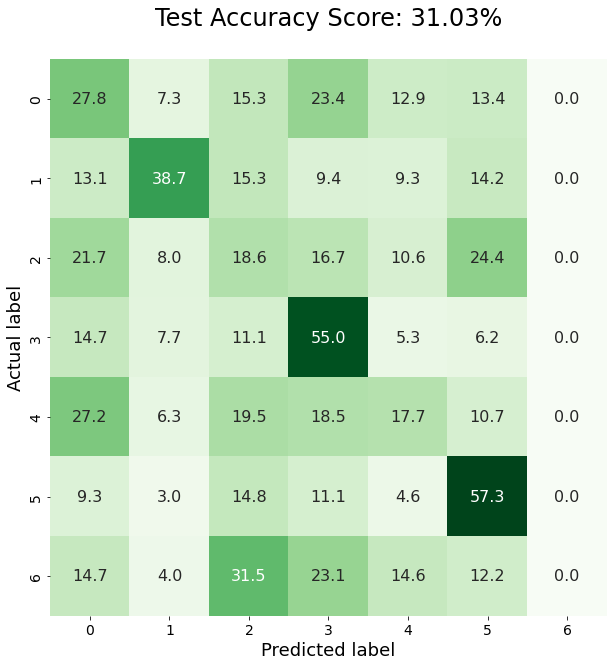

In [ ]:
#Load the model and test for accuracy 
loaded_model = pickle.load(open(sdg_model_dump, 'rb'))
score = loaded_model.score(X_test, y_test)
print(score)
y_pred = loaded_model.predict(X_test)
plot_cm(confusion_matrix(y_test, y_pred),score)

In [ ]:
#need f1 score and other stuff 

### Random Forest Classifier

0.47429078014184395


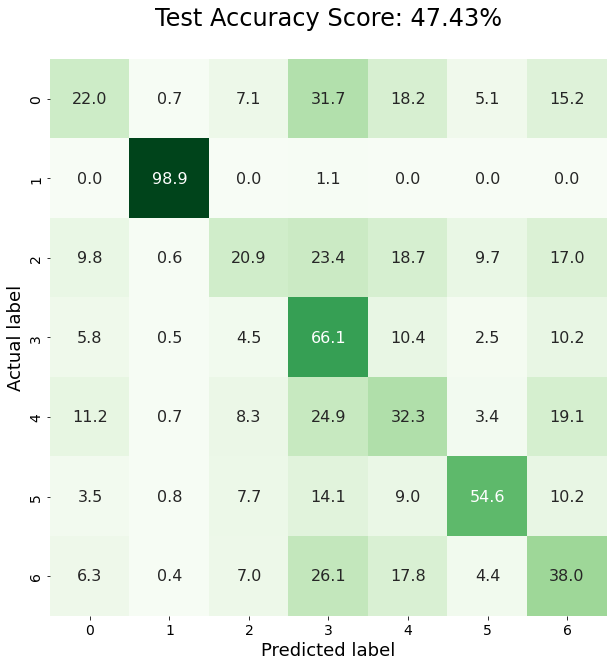

In [ ]:
#Load the model and test for accuracy 
loaded_model = pickle.load(open(rf_model_dump, 'rb'))
score = loaded_model.score(X_test, y_test)
print(score)
y_pred = loaded_model.predict(X_test)
plot_cm(confusion_matrix(y_test, y_pred),score)

emotion_labels = {0:'angry', 1:'disgust', 2:'fear', 3:'happy', 4:'sad', 5:'surprise', 6:'neutral'}

##Data : fer_pca_std

In [ ]:
#Loading data for model analysis 
#data_list = [('data/fer_lda_std.csv',4), ('data/fer_pca_std.csv',1),('data/hog_scaled2.csv',3)]
X_train, X_test, y_train, y_test = custom_train_test_split('../data/fer_pca_std.csv', 1)
rf_model_dump = 'rf_fer_pca_std'
sdg_model_dump = 'sdg_fer_pca_std'

../data/fer_pca_std.csv
Shape of data > : (X_train, X_test, y_train, y_test) (31432, 112) (7896, 112) (31432,) (7896,)


### SGD Classifier

0.3140830800405269


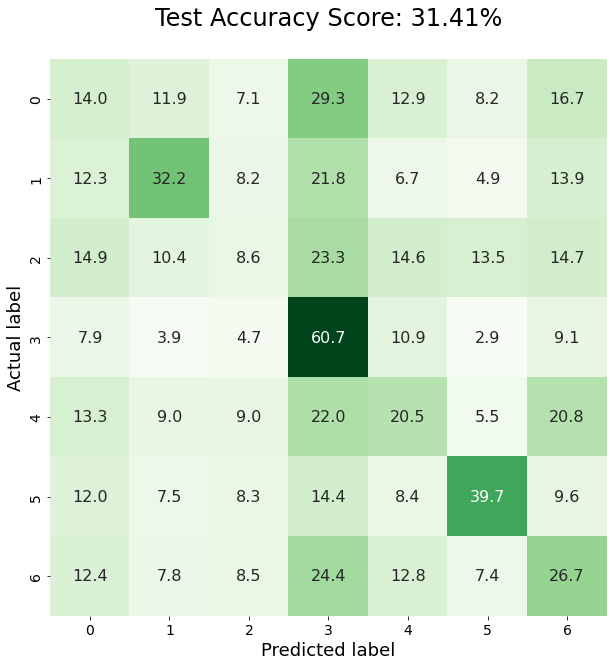

In [ ]:
#Load the model and test for accuracy 
loaded_model = pickle.load(open(sdg_model_dump, 'rb'))
score = loaded_model.score(X_test, y_test)
print(score)
y_pred = loaded_model.predict(X_test)
plot_cm(confusion_matrix(y_test, y_pred),score)

### Random Forest Classifier

0.5115248226950354


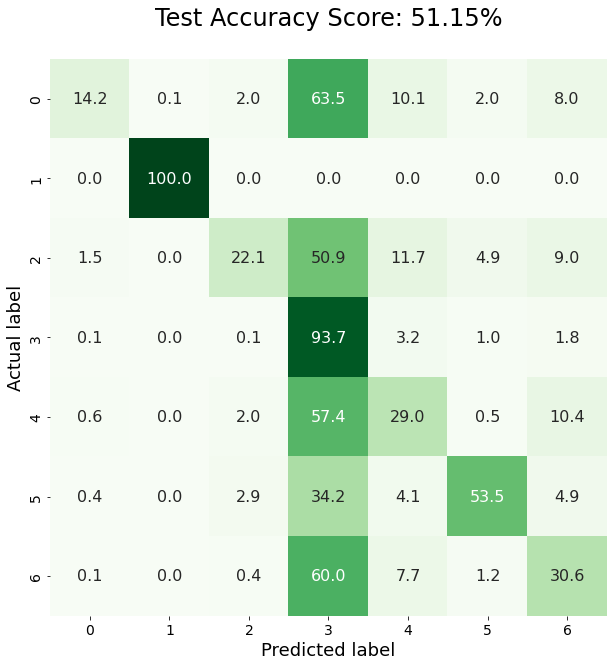

In [ ]:
#Load the model and test for accuracy 
loaded_model = pickle.load(open(rf_model_dump, 'rb'))
score = loaded_model.score(X_test, y_test)
print(score)
y_pred = loaded_model.predict(X_test)
plot_cm(confusion_matrix(y_test, y_pred),score)

##Data : hog_scaled2

In [ ]:
cd FinalModel

/content/drive/MyDrive/Colab Notebooks/facial-expression-recognition/Version_2.0/FinalModel


In [ ]:
#Loading data for model analysis 
#data_list = [('data/fer_lda_std.csv',4), ('data/fer_pca_std.csv',1),('data/hog_scaled2.csv',3)]
X_train, X_test, y_train, y_test = custom_train_test_split('../data/hog_scaled2.csv', 3)
rf_model_dump = 'rf_hog_scaled2'
sdg_model_dump = 'sdg_hog_scaled2'

../data/hog_scaled2.csv
Shape of data > : (X_train, X_test, y_train, y_test) (31432, 2304) (7896, 2304) (31432,) (7896,)


### SGD Classifier

0.3618287740628166


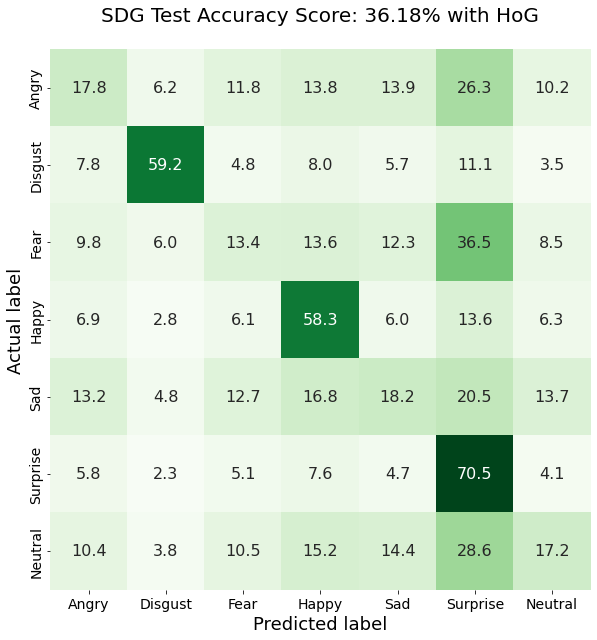

In [ ]:
#Load the model and test for accuracy 
loaded_model = pickle.load(open(sdg_model_dump, 'rb'))
score = loaded_model.score(X_test, y_test)
print(score)
y_pred = loaded_model.predict(X_test)
plot_cm(confusion_matrix(y_test, y_pred),score, 'SDG', 'HoG')

In [ ]:
loaded_model = pickle.load(open(sdg_model_dump, 'rb'))
y_pred = loaded_model.predict(X_test)
cm=Confusion_matrix(y_test, y_pred, target_names=['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'])

Confusion Matrix of given model is :
Count=7896           Angry      Disgust    Fear       Happy      Sad        Surprise   Neutral   
Actual Angry          170        59         113        132        133        252        98        
Actual Disgust        65         491        40         66         47         92         29        
Actual Fear           100        61         137        139        126        374        87        
Actual Happy          122        50         108        1034       107        241        112       
Actual Sad            165        60         158        210        227        256        171       
Actual Surprise       48         19         42         63         39         586        34        
Actual Neutral        128        47         129        187        177        353        212       


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.21      0.18      0.19       957
           1       0.62      0.59      0.61       830
           2       0.19      0.13      0.16      1024
           3       0.56      0.58      0.57      1774
           4       0.27      0.18      0.22      1247
           5       0.27      0.71      0.39       831
           6       0.29      0.17      0.21      1233

    accuracy                           0.36      7896
   macro avg       0.34      0.36      0.34      7896
weighted avg       0.36      0.36      0.35      7896



In [ ]:
performance_report(cm, 'SGD', 'HoG\n')

       Classification Report for SGD with HoG

       labels Precision    Recall  F1-Score   Support

        Angry      0.21      0.18      0.19       957
      Disgust      0.62      0.59      0.61       830
         Fear      0.19      0.13      0.16      1024
        Happy      0.56      0.58      0.57      1774
          Sad      0.27      0.18      0.22      1247
     Surprise      0.27      0.71      0.39       831
      Neutral      0.29      0.17      0.21      1233

     Accuracy                          0.36      7896
    Macro_avg      0.34      0.36      0.34      7896
 Weighted_avg      0.36      0.36      0.35      7896


{'Accuracy': ['', '', 0.3618287740628166, 7896],
 'Angry': [0.21303258145363407, 0.17763845350052246, 0.19373219373219372, 957],
 'Disgust': [0.6238881829733164, 0.591566265060241, 0.6072974644403216, 830],
 'Fear': [0.18844566712517194, 0.1337890625, 0.15648201027984007, 1024],
 'Happy': [0.5647187329328236, 0.5828635851183765, 0.5736477115117892, 1774],
 'Macro_avg': [0.34466483156267463,
  0.3635724435712846,
  0.3363208811033835,
  7896],
 'Neutral': [0.2853297442799462,
  0.17193836171938362,
  0.2145748987854251,
  1233],
 'Sad': [0.2651869158878505, 0.18203688853247796, 0.21588207322872088, 1247],
 'Surprise': [0.2720519962859796,
  0.7051744885679904,
  0.39262981574539363,
  831],
 'Weighted_avg': [0.35778288188968566,
  0.3618287740628166,
  0.34541519706670626,
  7896]}

### Random Forest Classifier

0.5514184397163121


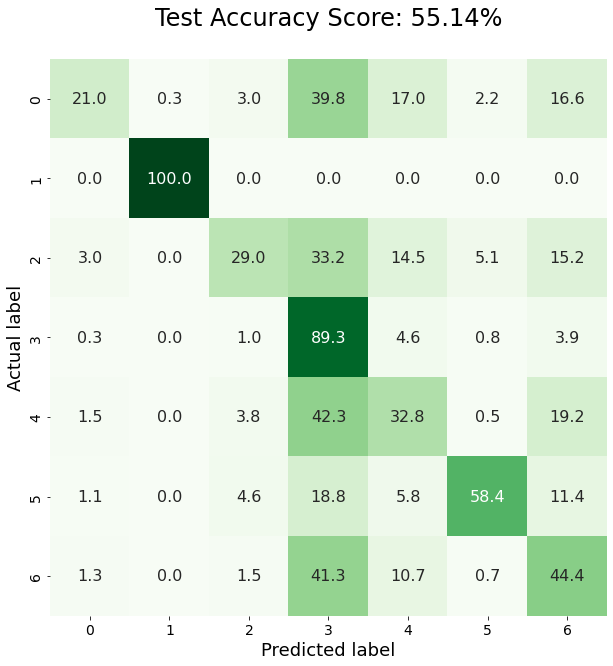

In [ ]:
#Load the model and test for accuracy 
loaded_model = pickle.load(open(rf_model_dump, 'rb'))
score = loaded_model.score(X_test, y_test)
print(score)
y_pred = loaded_model.predict(X_test)
plot_cm(confusion_matrix(y_test, y_pred),score)

In [ ]:
loaded_model = pickle.load(open(rf_model_dump, 'rb'))
y_pred = loaded_model.predict(X_test)
cm=Confusion_matrix(y_test, y_pred, target_names=['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'])

Confusion Matrix of given model is :
Count=7896           Angry      Disgust    Fear       Happy      Sad        Surprise   Neutral   
Actual Angry          201        3          29         381        163        21         159       
Actual Disgust        0          830        0          0          0          0          0         
Actual Fear           31         0          297        340        148        52         156       
Actual Happy          6          0          18         1584       81         15         70        
Actual Sad            19         0          47         527        409        6          239       
Actual Surprise       9          0          38         156        48         485        95        
Actual Neutral        16         0          19         509        132        9          548       


In [ ]:
performance_report(cm, 'Random forest', 'HoG\n')

       Classification Report for Random forest with HoG

       labels Precision    Recall  F1-Score   Support

        Angry      0.71      0.21      0.32       957
      Disgust      1.00      1.00      1.00       830
         Fear      0.66      0.29      0.40      1024
        Happy      0.45      0.89      0.60      1774
          Sad      0.42      0.33      0.37      1247
     Surprise      0.82      0.58      0.68       831
      Neutral      0.43      0.44      0.44      1233

     Accuracy                          0.55      7896
    Macro_avg      0.64      0.54      0.55      7896
 Weighted_avg      0.60      0.55      0.53      7896


{'Accuracy': ['', '', 0.5514184397163121, 7896],
 'Angry': [0.7127659574468085, 0.21003134796238246, 0.324455205811138, 957],
 'Disgust': [0.9963985594237695, 1.0, 0.9981960312687913, 830],
 'Fear': [0.6629464285714286, 0.2900390625, 0.4035326086956522, 1024],
 'Happy': [0.45295967972547896, 0.8928974069898534, 0.6010244735344338, 1774],
 'Macro_avg': [0.6427628320413589,
  0.5355762295421018,
  0.5451905324455192,
  7896],
 'Neutral': [0.4325177584846093,
  0.4444444444444444,
  0.43839999999999996,
  1233],
 'Sad': [0.4169215086646279, 0.3279871692060946, 0.367145421903052, 1247],
 'Surprise': [0.8248299319727891, 0.5836341756919374, 0.6835799859055673, 831],
 'Weighted_avg': [0.5990583372940943,
  0.5514184397163121,
  0.5299991963867049,
  7896]}

## Curves

In [ ]:
sdg = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3,
                      alpha= 0.0001, learning_rate= 'optimal', 
                      loss='hinge', penalty= 'l1')

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
cv_scores = []
for k in k_list:
    knn = KNN(n_neighbors=k, weights='distance', metric='minkowski')
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    # Append avg score to the list
    cv_scores.append(scores.mean())
    print('CV accuracy scores: %s' % scores)
    print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

In [ ]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(model, X_train,y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

## SVM & KNN

In [ ]:
svm = SVC(C=10.0, random_state=1, kernel='rbf', gamma='auto', decision_function_shape='ovo')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

In [ ]:
filename = 'svm_hog.sav'
pickle.dump(svm, open(filename, 'wb'))

In [ ]:
#Load the model and test for accuracy 
loaded_model = pickle.load(open(filename, 'rb'))
score = loaded_model.score(X_test, y_test)
print(score)
y_pred = loaded_model.predict(X_test)
plot_cm(confusion_matrix(y_test, y_pred),score)

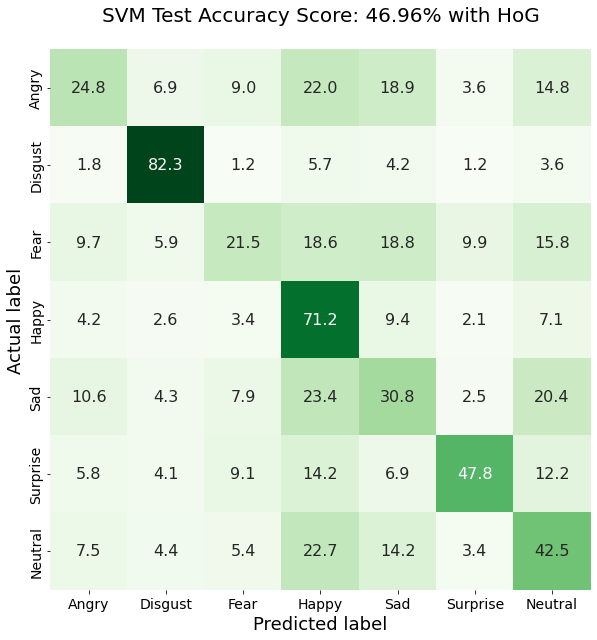

In [ ]:
svm_cm = confusion_matrix(y_test, y_pred)
one_plot_cm(svm_cm,score,'SVM')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier as KNN
knn = KNN(n_neighbors=2, weights='distance', metric='minkowski')
knn.fit(X_train, y_train)
filename = 'knn_hog.sav'
pickle.dump(svm, open(filename, 'wb'))

In [ ]:
filename = 'knn_hog.sav'
loaded_model = pickle.load(open(filename, 'rb'))
y_pred = knn.predict(X_test)
print('Train Accuracy: %.3f' % knn.score(X_train, y_train))
print('Test Accuracy: %.3f' % knn.score(X_test, y_test))

Train Accuracy: 0.998
Test Accuracy: 0.517


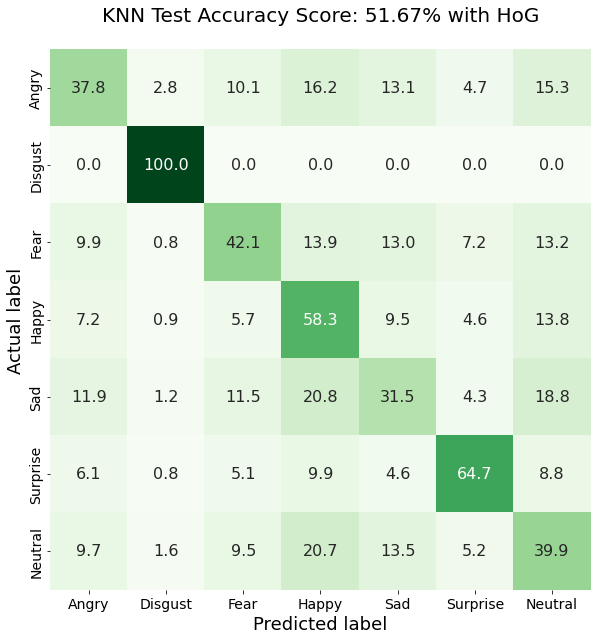

In [ ]:
knn_cm = confusion_matrix(y_test, y_pred)
knn_score=  knn.score(X_test, y_test)
one_plot_cm(knn_cm,knn_score,'KNN')

In [ ]:
#emotions = {'angry':0, 'disgust':1, 'fear':2, 'happy':3, 'sad':4, 'surprise':5, 'neutral':6}
emotion_labels = {0:'Angry', 1:'Disgust', 2:'Fear', 3:'Happy', 4:'Sad', 5:'Surprise', 6:'Neutral'}
lb = emotions.values()
lb

dict_values([0, 1, 2, 3, 4, 5, 6])

In [ ]:
plot_cm(confusion_matrix(y_test, y_pred),confusion_matrix(y_test, y_pred),score, 'RandomForest', 'hog')

In [ ]:
plot_cm(confusion_matrix(y_test, y_pred),score, 'RandomForest')

In [ ]:
def plot_cm(cm, cm1,testscore,model_name, data):
  '''provide cm item and test score'''
  emotion_labels_cm = {0:'Angry', 1:'Disgust', 2:'Fear', 3:'Happy', 4:'Sad', 5:'Surprise', 6:'Neutral'}
  cm_labels_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
  cm_labels_norm = cm_labels_norm * 100.00

  cm_labels_norm1 = cm1.astype('float') / cm1.sum(axis=1)[:, np.newaxis]
  cm_labels_norm1 = cm_labels_norm * 100.00

  #plt.figure(figsize=(9,9))
  fig, ax  = plt.subplots(1, 2, sharex='col', figsize=(18, 9))
  sns.heatmap(cm_labels_norm,
              annot=True, 
              annot_kws={'size':16},
              fmt=".1f",
            cmap='Greens', #Spectral 'binary'
            xticklabels=[i for i in emotion_labels_cm.values()],
            yticklabels=[i for i in emotion_labels_cm.values()],
            square=True,
            cbar=False, 
            ax=ax[0])
  sns.heatmap(cm_labels_norm1,
            annot=True, 
            annot_kws={'size':16},
            fmt=".1f",
          cmap='Greens', #Spectral 'binary'
          xticklabels=[i for i in emotion_labels_cm.values()],
          yticklabels=[],
          square=True,
          cbar=False, 
          ax=ax[1])
  plt.title('{} Test Accuracy Score: {}% with {}\n'.format(model_name, "%.2f" % (testscore*100.0), data), size=20)
  plt.xticks(size=14)
  plt.yticks(size=14)
  ax[0].ylabel('Actual label', size=18)
  plt.xlabel('Predicted label', size=18)
  plt.tight_layout()
  plt.show()

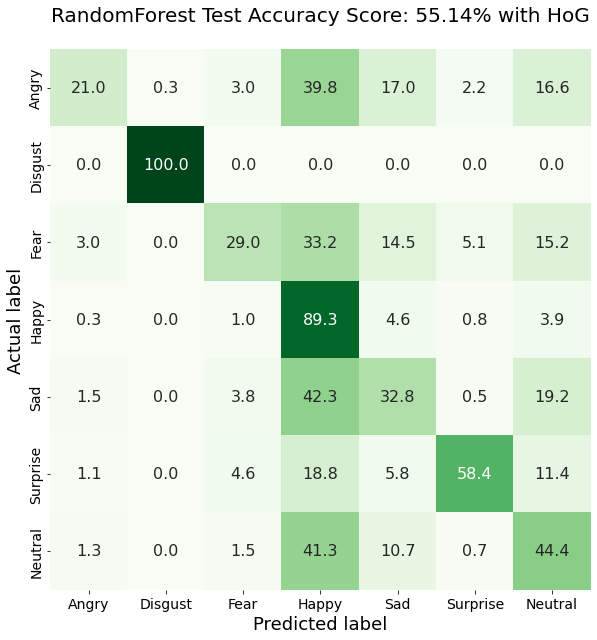

In [ ]:
plot_cm(confusion_matrix(y_test, y_pred),score, 'RandomForest', 'HoG')

In [ ]:
loaded_model = pickle.load(open(rf_model_dump, 'rb'))

In [ ]:
pred = loaded_model.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.71      0.21      0.32       957
           1       1.00      1.00      1.00       830
           2       0.66      0.29      0.40      1024
           3       0.45      0.89      0.60      1774
           4       0.42      0.33      0.37      1247
           5       0.82      0.58      0.68       831
           6       0.43      0.44      0.44      1233

    accuracy                           0.55      7896
   macro avg       0.64      0.54      0.55      7896
weighted avg       0.60      0.55      0.53      7896



### VotingClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators=2000,max_features='sqrt',
                            random_state=101, n_jobs=-1,max_depth=60, min_samples_leaf=1, min_samples_split=2)
  
sdg = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3,
                      alpha= 0.0001, learning_rate= 'optimal', 
                      loss='hinge', penalty= 'l1')

svm = SVC(C=10.0, random_state=1, kernel='rbf', gamma='auto')
knn = KNN(n_neighbors=2, weights='distance', metric='minkowski')

In [ ]:
from sklearn.ensemble import VotingClassifier
model = VotingClassifier(estimators=[('knn', knn), ('SDG', sdg),('SVM', svm)], voting='hard')
model.fit(X_train,y_train)
filename = 'VotingClassifier_HoG.sav'
pickle.dump(svm, open(filename, 'wb'))


In [ ]:
model_score=  model.score(X_test, y_test)

In [ ]:
model_score

0.4793566362715299

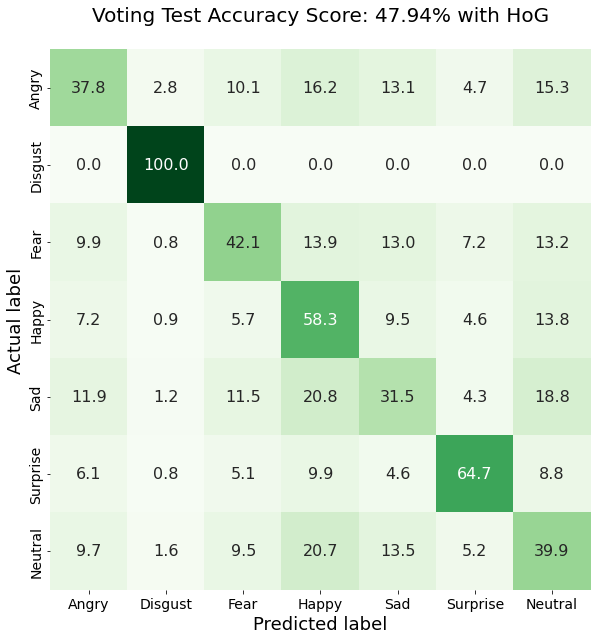

In [ ]:
model_y_pred = model.predict(X_test)
model_cm = confusion_matrix(y_test, y_pred)
one_plot_cm(model_cm,model_score,'Voting')

In [ ]:
 cr= performance_report(cm)

Performance report of the model is :
              Precision    Recall  F1-Score   Support

        Angry      0.32      0.35      0.34       957
      Disgust      0.63      0.87      0.73       830
         Fear      0.38      0.28      0.32      1024
        Happy      0.52      0.74      0.61      1774
          Sad      0.37      0.18      0.24      1247
     Surprise      0.73      0.44      0.55       831
      Neutral      0.41      0.44      0.42      1233

     Accuracy                          0.48      7896
    Macro_avg      0.48      0.47      0.46      7896
 Weighted_avg      0.47      0.48      0.46      7896


In [ ]:
cm=Confusion_matrix(y_test, model_y_pred, target_names=['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'])

Confusion Matrix of given model is :
Count=7896           Angry      Disgust    Fear       Happy      Sad        Surprise   Neutral   
Actual Angry          135        125        86         321        73         52         165       
Actual Disgust        105        130        92         256        63         47         137       
Actual Fear           149        152        101        317        76         62         167       
Actual Happy          213        238        167        620        134        116        286       
Actual Sad            168        181        111        383        110        80         214       
Actual Surprise       117        136        64         259        48         63         144       
Actual Neutral        159        179        117        392        111        76         199       


# Function

In [2]:
def plot_cm(cm,testscore):
  '''provide cm item and test score'''
  cm_labels_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
  cm_labels_norm = cm_labels_norm * 100.00

  plt.figure(figsize=(9,9))
  sns.heatmap(cm_labels_norm,
              annot=True, 
              annot_kws={'size':16},
              fmt=".1f",
            cmap='Greens',
            xticklabels=[i for i in emotions.values()],
            yticklabels=[i for i in emotions.values()],
            square=True,
            cbar=False)
  plt.title('Test Accuracy Score: {0}%\n'.format("%.2f" % (testscore*100.0)), size=24)
  plt.tight_layout()
  plt.xticks(size=14)
  plt.yticks(size=14)
  plt.ylabel('Actual label', size=18)
  plt.xlabel('Predicted label', size=18)
  plt.show()

In [3]:
def rf_model(X_train,y_train, filename):
  #bestFit
  print('RandomForestClassifier')
  rf = RandomForestClassifier(n_estimators=2000,max_features='sqrt',
                              random_state=101, n_jobs=-1,max_depth=60, min_samples_leaf=1, min_samples_split=2)
  rf.fit(X_train,y_train)
  #Saving the model in google drive 
  filename = 'FinalModel/rf_'+filename+'.sav'
  pickle.dump(rf, open(filename, 'wb'))

def sdg_model(X_train,y_train, filename):
  print(SGDClassifier)
  #Best Params: SDG {'alpha': 0.0001, 'learning_rate': 'optimal', 'loss': 'hinge', 'penalty': 'l1'}
  sdg = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3,
                          alpha= 0.0001, learning_rate= 'optimal', 
                          loss='hinge', penalty= 'l1')
  sdg.fit(X_train, y_train)
  #Saving the model in google drive 
  filename='FinalModel/sdg_'+filename+'.sav'
  pickle.dump(sdg, open(filename, 'wb'))

In [4]:
def one_plot_cm(cm,testscore,model_name, data):
  '''provide cm item and test score'''
  emotion_labels_cm = {0:'Angry', 1:'Disgust', 2:'Fear', 3:'Happy', 4:'Sad', 5:'Surprise', 6:'Neutral'}
  cm_labels_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
  cm_labels_norm = cm_labels_norm * 100.00

  plt.figure(figsize=(9,9))
  sns.heatmap(cm_labels_norm,
              annot=True, 
              annot_kws={'size':16},
              fmt=".1f",
            cmap='Greens', #Spectral 'binary'
            xticklabels=[i for i in emotion_labels_cm.values()],
            yticklabels=[i for i in emotion_labels_cm.values()],
            square=True,
            cbar=False)
  plt.title('{} Test Accuracy Score: {}% with {}\n'.format(model_name, "%.2f" % (testscore*100.0), data), size=20)
  plt.xticks(size=14)
  plt.yticks(size=14)
  plt.ylabel('Actual label', size=18)
  plt.xlabel('Predicted label', size=18)
  plt.tight_layout()
  plt.show()

In [5]:
def import_data_return2set(dir, labels_dic):
  '''this funciton will be used to extract image data into 2 list,
  1st list labels will contain labels information and 
  2nd list images will contain flaten pixels of each image.
  - image data is already reshed into 48,48 numpy array'''
  
  data=[]
  labels= []
  labels_code = []
  for directory in sorted(glob(dir+'/*')):
    image_files = glob(directory + '/*.jpg')
    label = directory.split('/')[-1]
    for image_file in image_files:
     # image = resize(imread(image_file), (48,48))
      data.append(resize(imread(image_file), (48,48)))
      labels.append(labels_dic[label])
      labels_code.append(label)

  return data, labels,labels_code

In [6]:
def import_data(dir):
  '''this funciton will be used to extract image data into 2 list,
  1st list labels will contain labels information and 
  2nd list images will contain flaten pixels of each image.
  - image data is already reshed into 48,48 numpy array'''

  data=[]
  for directory in sorted(glob(dir+'/*')):
    image_files = glob(directory + '/*.jpg')
    label = directory.split('/')[-1]
    for image_file in image_files:
      image = resize(imread(image_file), (48,48))
      data.append(( label, image))
  return data

In [7]:
def load_data(df, data_type):
    """Load data from DataFrame and return data to list 
    """
    image_data = []
    image_scaled = []
    
    for index, row in df.iterrows():
        if data_type == 1:
            field = row.pca
        elif data_type == 2:
            field = row.histogram
        elif data_type == 3:
            field = row.hog
        elif data_type == 4:
            field = row.lda
        else:
            field = row.pixels
        image = np.fromstring(field, sep=' ')
        image_data.append(image)
        if data_type == 0:
            scale = image / 255.0
            image_scaled.append(scale)
        
    return image_data, image_scaled

In [8]:
def custom_train_test_split(csv, data_type):
    """process the data output will be 
    X_train, X_test, y_train, y_test
    """
    print(csv)
    df = pd.read_csv(csv)
    # shuffle the DataFrame rows
    df = df.sample(frac = 1)
    df_train = df[df['usage']=='train']
    df_test = df[df['usage']=='test']
    #we are taking a subset of our Data frame with only training data 
    train_data, _ = load_data(df_train, data_type)
    #we are taking a subset of our data frame with only testing data 
    test_data, _ = load_data(df_test, data_type)

    print('Shape of data > :', '(X_train, X_test, y_train, y_test)', 
          np.array(train_data).shape, 
          np.array(test_data).shape, 
          np.array(df_train.emotion).shape, 
          np.array(df_test.emotion).shape)

    return (np.array(train_data), 
            np.array(test_data), 
            np.array(df[df['usage']=='train'].emotion), 
            np.array(df_test.emotion))

In [9]:
def processSDG(csv, data_type):
    """Process SVM for each csv data
    """
    print(csv)
    df = pd.read_csv(csv)
    df.head()
    
    df_train = df[df['usage']=='train']
    df_test = df[df['usage']=='test']
    train_data, train_scaled = load_data(df_train, data_type)
    train_target = list(df_train.emotion)
    test_data, test_scaled = load_data(df_test, data_type)
    test_target = list(df_test.emotion)
    
    X_train = np.array(train_data)
    y_train = np.array(train_target)
    X_test = np.array(test_data)
    y_test = np.array(test_target)
    
    print(X_train.shape)
    print(y_train.shape)
    print(X_test.shape)
    print(y_test.shape)
    
    #Orginal Data 
    model = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)
    #model = SVC(C=5, random_state=1, kernel='rbf', gamma='auto', decision_function_shape='ovo')

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    model_score=accuracy_score(y_test, y_pred)
    #print(model.score(X_train, y_train))
    print('Train Accuracy: %.3f' % model.score(X_train, y_train))
    print('Test Accuracy: %.3f' % model.score(X_test, y_test))
    
    return y_pred, y_test

In [10]:
def modified_huber_loss(y_true, y_pred):
    z = y_pred * y_true
    loss = -4 * z
    loss[z >= -1] = (1 - z[z >= -1]) ** 2
    loss[z >= 1.0] = 0
    return loss


In [11]:
##borrowed the function from geeksforgeeks website
##*** note function has been modified to be used with this project
#url: https://www.geeksforgeeks.org/compute-classification-report-and-confusion-matrix-in-python/ 
#    cm=Confusion_matrix(y_test, y_pred, classes)
    #cr=performance_report(cm)
    #print("\nCR by library method=\n",
         # classification_report(y_test, y_pred))
def performance_report(cm, model, dataType):
    col = len(cm)
      
    # col=number of class
    arr = []
    for key, value in cm.items():
        arr.append(value)
  
    cr = dict()
    support_sum = 0
      
    # macro avg of support is
    # sum of support only, not the mean.
    macro = [0]*3  
      
    # weighted avg of support is
    # sum of support only, not the mean.
    weighted = [0]*3
    for i in range(col):
        vertical_sum= sum([arr[j][i] for j in range(col)])
        horizontal_sum= sum(arr[i])
        p = arr[i][i] / vertical_sum
        r = arr[i][i] / horizontal_sum
        f = (2 * p * r) / (p + r)
        s = horizontal_sum
        row=[p,r,f,s]
        support_sum+=s
        for j in range(3):
            macro[j]+=row[j]
            weighted[j]+=row[j]*s
        cr[list(cm.keys())[i]]=row
  
    # add Accuracy parameters.
    truepos=0
    total=0
    for i in range(col):
        truepos+=arr[i][i]
        total+=sum(arr[i])
  
    cr['Accuracy']=["", "", truepos/total, support_sum]
  
    # Add macro-weight and weighted_avg features.
    macro_avg=[Sum/col for Sum in macro]
    macro_avg.append(support_sum)
    cr['Macro_avg']=macro_avg
  
    weighted_avg=[Sum/support_sum for Sum in weighted]
    weighted_avg.append(support_sum)
    cr['Weighted_avg']=weighted_avg
  
    # print the classification_report
    print("       Classification Report for {} with {}".format(model, dataType))
    space,p,r,f,s="labels","Precision","Recall","F1-Score","Support"
    print("%13s %9s %9s %9s %9s\n"%(space,p,r,f,s))
    stop=0
    for key,value in cr.items():
        if stop<col:
            stop+=1
            print("%13s %9.2f %9.2f %9.2f %9d"%(key,value[0],
                                                value[1],
                                                value[2],
                                                value[3]))
        elif stop==col:
            stop+=1
            print("\n%13s %9s %9s %9.2f %9d"%(key,value[0],
                                              value[1],
                                              value[2],
                                              value[3]))
        else:
            print("%13s %9.2f %9.2f %9.2f %9d"%(key,
                                                value[0],
                                                value[1],
                                                value[2],
                                                value[3]))
 
            
def Confusion_matrix(y_test, y_pred, target_names=None):
    
    # target_names is a list.
    # actual values are arranged in the rows.
    # predicted values are arranged in the columns.
    # if there are m classes, then cm is m*m matrix.
    if target_names == None:
        m = len(set(y_test))
    else:
        m = len(target_names)
    size = len(y_test)
    matrix = dict()
  
    # create matrix initialised with 0
    for class_name in range(m):
        matrix[class_name] = [0 for k in range(m)]
  
    # populating the matrix.
    for i in range(size):
        actual_class = y_test[i]
        pred_class = y_pred[i]
        matrix[actual_class][pred_class] += 1
  
    # Change the name of columns.
    if target_names == None:
        # Now, lets print the confusion matrix.
        print("Confusion Matrix of given model is :")
        if m == 3:
            print("Count=%-14d %-15s %-15s %-15s" % (size, 
                                                     '0', '1',
                                                     '2'))
            for key, value in matrix.items():
                print("Actual %-13s %-15d %-15d %-15d" %
                      (key, value[0], value[1], value[2]))
        elif m == 2:
            print("Count=%-14d %-15s %-15s" % (size, '0', '1'))
            for key, value in matrix.items():
                print("Actual %-13s %-15d %-15d" % (key, value[0], 
                                                    value[1]))
    else:
        matrix = dict(zip(target_names, list(matrix.values())))
  
        # Now, lets print the confusion matrix.
        print("Confusion Matrix of given model is :")
        print("Count=%-14d %-10s %-10s %-10s %-10s %-10s %-10s %-10s" %
              (size, target_names[0], target_names[1], target_names[2],target_names[3],target_names[4],target_names[5],target_names[6]))
        for key, value in matrix.items():
            print("Actual %-14s %-10d %-10d %-10d %-10d %-10d %-10d %-10d" %
                  (key, value[0], value[1], value[2], value[3], value[4], value[5], value[6]))
  
    return matrix
  

In [12]:
#**